In [ ]:
import pandas as pd
import matplotlib.pyplot  as plt
import numpy              as np
import plotly.express       as px
import pydotplus         as pdp
import plotly.graph_objects as go
from plotly.subplots import make_subplots
import seaborn as sns

In [262]:
import chardet

with open('data.csv', 'rb') as f:
    result = chardet.detect(f.read(100000))
result

{'encoding': 'Windows-1252', 'confidence': 0.73, 'language': ''}

In [263]:
# link https://www.kaggle.com/datasets/vivek468/superstore-dataset-final?resource=download

df = pd.read_csv('data.csv', encoding= 'Windows-1252')
df.shape

(9994, 21)

In [264]:
df.head()

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,...,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
0,1,CA-2016-152156,11/8/2016,11/11/2016,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600,2,0.00,41.9136
1,2,CA-2016-152156,11/8/2016,11/11/2016,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,3,0.00,219.5820
2,3,CA-2016-138688,6/12/2016,6/16/2016,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,...,90036,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200,2,0.00,6.8714
3,4,US-2015-108966,10/11/2015,10/18/2015,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,5,0.45,-383.0310
4,5,US-2015-108966,10/11/2015,10/18/2015,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680,2,0.20,2.5164


### DATA QUALITY

#### Missing values

In [265]:
df.isnull().sum()

Row ID           0
Order ID         0
Order Date       0
Ship Date        0
Ship Mode        0
Customer ID      0
Customer Name    0
Segment          0
Country          0
City             0
State            0
Postal Code      0
Region           0
Product ID       0
Category         0
Sub-Category     0
Product Name     0
Sales            0
Quantity         0
Discount         0
Profit           0
dtype: int64

#### Data Types

In [266]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Row ID         9994 non-null   int64  
 1   Order ID       9994 non-null   object 
 2   Order Date     9994 non-null   object 
 3   Ship Date      9994 non-null   object 
 4   Ship Mode      9994 non-null   object 
 5   Customer ID    9994 non-null   object 
 6   Customer Name  9994 non-null   object 
 7   Segment        9994 non-null   object 
 8   Country        9994 non-null   object 
 9   City           9994 non-null   object 
 10  State          9994 non-null   object 
 11  Postal Code    9994 non-null   int64  
 12  Region         9994 non-null   object 
 13  Product ID     9994 non-null   object 
 14  Category       9994 non-null   object 
 15  Sub-Category   9994 non-null   object 
 16  Product Name   9994 non-null   object 
 17  Sales          9994 non-null   float64
 18  Quantity

In [267]:
df['Order Date'] = pd.to_datetime(df['Order Date'], format= '%m/%d/%Y')
df['Ship Date'] = pd.to_datetime(df['Ship Date'], format= '%m/%d/%Y')
df['Ship Days'] = df['Ship Date'] - df['Order Date']
df['Ship Days'] = df['Ship Days'].dt.days

#### Duplicated Rows

In [268]:
df.duplicated().sum()

np.int64(0)

### Unique Values

In [269]:
df_ = pd.DataFrame({'columns': df.columns, 'n_unique': [df[col].nunique() for col in df.columns]})
df_ = df_.sort_values(by='n_unique', ascending=True)
df_

,columns,n_unique
8,Country,1
7,Segment,3
14,Category,3
4,Ship Mode,4
12,Region,4
21,Ship Days,8
19,Discount,12
18,Quantity,14
15,Sub-Category,17
10,State,49


In [827]:
cols = ['Row ID', 'Order ID', 'Order Date', 'Ship Date','Customer ID', 'Customer Name','City',
       'Postal Code', 'Product ID','Product Name']
df_ = pd.DataFrame({'column': df.columns, 'n_unique': [df[col].nunique() for col in df.columns]}).sort_values(by='n_unique', ascending= True)

fig = px.scatter(
    df_,
    x='n_unique',
    y='column',
    orientation='h',
    title='Unique Value Count',
)

fig.update_traces(
    marker=dict(
        size=10,
        color='LightSeaGreen',
        opacity=0.8
    )
)

fig.update_layout(
    xaxis_title='Count',
    yaxis_title='Column',
    title_font=dict(size=16, weight='bold'),
    height=500,
    
    showlegend=False
)

fig.update_xaxes(
    title_font=dict(size=10),
    tickfont=dict(size=12)
)

fig.update_yaxes(
    title_font=dict(size=10),
    tickfont=dict(size=12)
)


fig.show()


Outliers

In [272]:
num_cols = ['Sales', 'Quantity', 'Discount', 'Profit']

n = df.shape[0]
for col in num_cols:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR

    below_lower = df[df[col] < lower]
    above_upper = df[df[col] > upper]
    print(f'\n======= {col} =======')
    print(f'Lower Outlier: {below_lower.shape[0]} '
          f'({below_lower.shape[0] / n * 100:.2f}%)')
    print(f'Upper Outlier: {above_upper.shape[0]} '
          f'({above_upper.shape[0] / n * 100:.2f}%)')


======= Sales =======
Lower Outlier: 0 (0.00%)
Upper Outlier: 1167 (11.68%)

======= Quantity =======
Lower Outlier: 0 (0.00%)
Upper Outlier: 170 (1.70%)

======= Discount =======
Lower Outlier: 0 (0.00%)
Upper Outlier: 856 (8.57%)

======= Profit =======
Lower Outlier: 604 (6.04%)
Upper Outlier: 1277 (12.78%)


Mặc dù tồn tại một tỷ lệ đáng kể các upper outliers trong biến Sales, phân phối của các đơn hàng giá trị cao này nhìn chung tương đồng với toàn bộ dữ liệu theo hầu hết các chiều phân tích như Ship Mode, Segment, Region và Ship Days.
Sự khác biệt chủ yếu xuất hiện ở cấp độ Sub-Category, cho thấy các outliers phản ánh đặc điểm mua hàng theo từng nhóm sản phẩm hơn là các giá trị bất thường hay lỗi dữ liệu.

Although a relatively high proportion of upper outliers is observed across several sub-categories (ranging from ~5% to ~28%), these values reflect genuine purchasing behavior rather than data anomalies.
The absence of lower outliers and the systematic variation across product categories suggest that high-value orders are driven by bulk purchases or high-priced items. Therefore, the outliers were retained for further analysis.

### Duplicated Rows

In [273]:
print(f'Duplicated rows: {df.duplicated().sum()}')
df.drop_duplicates(inplace=True)
print(f'Duplicated rows eliminated')

Duplicated rows: 0
Duplicated rows eliminated


### Drop and Rename Columns

In [274]:
df.drop(['Row ID', 'Country', 'Postal Code'], axis= 1, inplace=True)
df.shape

(9994, 19)

In [275]:
df.columns

Index(['Order ID', 'Order Date', 'Ship Date', 'Ship Mode', 'Customer ID',
       'Customer Name', 'Segment', 'City', 'State', 'Region', 'Product ID',
       'Category', 'Sub-Category', 'Product Name', 'Sales', 'Quantity',
       'Discount', 'Profit', 'Ship Days'],
      dtype='object')

In [276]:
df.columns = ['order_id', 'order_date', 'ship_date', 'ship_mode', 'customer_id', 'customer_name','segment', 
              'city', 'state', 'region', 'product_id', 'category', 'sub_category', 'product_name', 
              'sales', 'quantity', 'discount', 'profit', 'ship_days']
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 19 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   order_id       9994 non-null   object        
 1   order_date     9994 non-null   datetime64[ns]
 2   ship_date      9994 non-null   datetime64[ns]
 3   ship_mode      9994 non-null   object        
 4   customer_id    9994 non-null   object        
 5   customer_name  9994 non-null   object        
 6   segment        9994 non-null   object        
 7   city           9994 non-null   object        
 8   state          9994 non-null   object        
 9   region         9994 non-null   object        
 10  product_id     9994 non-null   object        
 11  category       9994 non-null   object        
 12  sub_category   9994 non-null   object        
 13  product_name   9994 non-null   object        
 14  sales          9994 non-null   float64       
 15  quantity       9994 n

### Database

In [277]:
# customers = (
#     df[['customer_id', 'customer_name', 'segment', 'city', 'state', 'region']]
#     .drop_duplicates(subset='customer_id')
# )
# products = (
#     df[['product_id', 'category', 'sub_category', 'product_name']]
#     .drop_duplicates(subset='product_id')
# )
# orders = (
#     df[['order_id', 'order_date', 'customer_id', 'ship_date', 'ship_mode']]
#     .drop_duplicates(subset='order_id')
# )
# order_items = (
#     df[['order_id', 'product_id', 'total']]
#     .copy()
# )


In [278]:
# import sqlite3

# conn = sqlite3.connect('superstore.db')
# customers.to_sql('customers', conn, if_exists='replace', index=False)
# orders.to_sql('orders', conn, if_exists='replace', index=False)
# order_items.to_sql('order_items', conn, if_exists='replace', index=False)
# products.to_sql('products', conn, if_exists='replace', index=False)


In [279]:
# cursor = conn.cursor()

# cursor.execute("CREATE INDEX idx_orders_customer ON orders(customer_id)")
# cursor.execute("CREATE INDEX idx_order_items_order ON order_items(order_id)")
# cursor.execute("CREATE INDEX idx_order_items_product ON order_items(product_id)")
# cursor.execute("CREATE INDEX idx_customers_customer ON customers(customer_id)")
# cursor.execute("CREATE INDEX idx_products_product ON products(product_id)")

# conn.commit()


### EDA

### Numerical Columns

#### Distribution

In [280]:
num_cols = ['sales', 'quantity', 'discount', 'profit']

In [906]:
cols = ['sales', 'quantity', 'discount', 'profit']

fig = make_subplots(
    rows=len(cols),
    cols=2,
    subplot_titles=[
        f"{col.capitalize()}" if j == 0 else f"{col.capitalize()}"
        for col in cols for j in range(2)
    ],
    column_widths=[0.65, 0.35],
    vertical_spacing=0.08
)

for i, col in enumerate(cols, start=1):
    x = df[col].dropna()

    mean = x.mean()
    median = x.median()

    # Histogram
    fig.add_trace(
        go.Histogram(
            x=x,
            nbinsx=30,
            opacity=0.8,
            name=col,
            showlegend=False,
            marker= dict(color='LightSeaGreen')
        ),
        row=i, col=1
    )

    # Mean & Median lines
    fig.add_vline(x=mean, line_dash="dash", line_color="red", row=i, col=1)
    fig.add_vline(x=median, line_dash="solid", line_color="darkred", row=i, col=1)

    # Boxplot (horizontal)
    fig.add_trace(
        go.Box(
            x=x,
            orientation='h',
            boxmean=True,
            showlegend=False,
            marker= dict(color='LightSeaGreen')
        ),
        row=i, col=2
    )

fig.update_layout(
    height=300 * len(cols),
    width=1000,
    title_text="Numerical Column Distribution",
    title_x=0.5,
    bargap=0.05,
    title_font=dict(size=16, weight='bold')
)

fig.update_xaxes(title_font=dict(size=10), tickfont=dict(size=12))
fig.update_yaxes(title_font=dict(size=10), tickfont=dict(size=12))

fig.show()


#### Skewness

In [282]:
df_ = df[cols].skew().reset_index()
df_.columns = ['variable', 'skewness']
df_


,variable,skewness
0,sales,12.972752
1,quantity,1.278545
2,discount,1.684295
3,profit,7.561432


### Categorical Column Distributions

In [908]:

cols = ['state', 'sub_category']

fig = make_subplots(
    rows=1,
    cols=2,
    subplot_titles=['State','Sub-Category']
)

for i, col in enumerate(cols, start=1):
    vc = df[col].value_counts().sort_values()

    fig.add_trace(
        go.Bar(
            x=vc.values,
            y=vc.index,
            orientation='h',
            marker_color='LightSeaGreen',
        ),
        row=1,
        col=i
    )

fig.update_layout(
    title=dict(
        text='Value Count',
        x=0.5,
        font=dict(size=16, weight='bold')
    ),
    height=600,
    width=1000,
    showlegend=False,
)


fig.update_xaxes(title_font=dict(size=10), tickfont=dict(size=12), griddash='solid')
fig.update_yaxes(title_font=dict(size=10), tickfont=dict(size=12), griddash='solid')

fig.show()


In [910]:
cols = ['ship_mode', 'segment', 'region', 'category', 'ship_days']

fig = make_subplots(
    rows=len(cols),
    cols=2,
    column_widths=[0.65, 0.35],
    specs=[[{"type": "xy"}, {"type": "domain"}] for _ in cols],
    subplot_titles=['Ship Mode', 'Ship Mode', 'Segment', 'Segment', 'Region', 'Region', 'Category', 'Category', 'Ship Days', 'Ship Days'],
    vertical_spacing=0.08
)

for i, col in enumerate(cols, start=1):
    vc = df[col].value_counts()
    pct = vc / vc.sum() * 100

    # 🎨 Colorblind palette cho RIÊNG feature này
    colors = sns.color_palette("colorblind", n_colors=len(vc)).as_hex()

    # LEFT: Bar
    fig.add_trace(
        go.Bar(
            x=vc.index,
            y=vc.values,
            marker=dict(color=colors),
            hovertemplate=(
                f"<b>{col}</b><br>" +
                "Value: %{x}<br>" +
                "Count: %{y}<extra></extra>"
            )
        ),
        row=i,
        col=1
    )

    # RIGHT: Pie (dùng lại đúng colors đó)
    fig.add_trace(
        go.Pie(
            labels=vc.index,
            values=pct.values,
            hole=0.4,
            marker=dict(colors=colors),
            textinfo='percent',
            hovertemplate=(
                f"<b>{col}</b><br>" +
                "Value: %{label}<br>" +
                "Percent: %{value:.1f}%<extra></extra>"
            )
        ),
        row=i,
        col=2
    )

fig.update_layout(
    title=dict(
        text='Categorical Distribution',
        x=0.5,
        font=dict(size=18, weight='bold')
    ),
    height=300 * len(cols),
    width=1000,
    showlegend=False
)
fig.update_xaxes(title_font = dict(size=10), tickfont=dict(size=12))
fig.update_yaxes(title_font = dict(size=10), tickfont=dict(size=12), title='Count')
fig.show()


### Product Analysis

In [911]:
df_ = df['product_name'].value_counts().reset_index()
df_.columns = ['product_name', 'count']
df_ = df_.head(15).sort_values('count')

fig = go.Figure()

# Stem lines
for _, row in df_.iterrows():
    fig.add_trace(
        go.Scatter(
            x=[0, row['count']],
            y=[row['product_name'], row['product_name']],
            mode='lines',
            line=dict(color='lightgray', width=2),
            showlegend=False,
        )
    )

# Bubble points
fig.add_trace(
    go.Scatter(
        x=df_['count'],
        y=df_['product_name'],
        mode='markers',
        marker=dict(
            color='LightSeaGreen',
            opacity=0.85),
            showlegend=False
        )
    )


fig.update_layout(
    title=dict(
        text='Top 15 Most Purchased Products',
        x=0.5,
        font=dict(size=16, weight='bold')
    ),
    xaxis=dict(
        title='Purchase Count',
        gridcolor='lightgray',
        zeroline=False
    ),
    yaxis=dict(
        title='Product Name',
        automargin=True
    ),
    height=600,
    width= 1000,
    template='simple_white'
)
fig.update_xaxes(title_font=dict(size=10), tickfont=dict(size=12))
fig.update_yaxes(title_font=dict(size=10), tickfont=dict(size=12))

fig.show()


In [ ]:
import pandas as pd
import plotly.express as px


state_abbr = {
    'Alabama':'AL','Alaska':'AK','Arizona':'AZ','Arkansas':'AR','California':'CA',
    'Colorado':'CO','Connecticut':'CT','Delaware':'DE','Florida':'FL','Georgia':'GA',
    'Hawaii':'HI','Idaho':'ID','Illinois':'IL','Indiana':'IN','Iowa':'IA',
    'Kansas':'KS','Kentucky':'KY','Louisiana':'LA','Maine':'ME','Maryland':'MD',
    'Massachusetts':'MA','Michigan':'MI','Minnesota':'MN','Mississippi':'MS',
    'Missouri':'MO','Montana':'MT','Nebraska':'NE','Nevada':'NV','New Hampshire':'NH',
    'New Jersey':'NJ','New Mexico':'NM','New York':'NY','North Carolina':'NC',
    'North Dakota':'ND','Ohio':'OH','Oklahoma':'OK','Oregon':'OR','Pennsylvania':'PA',
    'Rhode Island':'RI','South Carolina':'SC','South Dakota':'SD','Tennessee':'TN',
    'Texas':'TX','Utah':'UT','Vermont':'VT','Virginia':'VA','Washington':'WA',
    'West Virginia':'WV','Wisconsin':'WI','Wyoming':'WY'
}

state_abbr_df = pd.DataFrame(
    state_abbr.items(),
    columns=['state', 'Abbreviation']
)


df_state = (
    df.groupby('state', as_index=False)
      .agg(
          total_quantity=('quantity', 'sum'),
          total_sales=('sales', 'sum')
      )
)


df_state = df_state.merge(
    state_abbr_df,
    on='state',
    how='left'
)


fig = px.choropleth(
    df_state,
    locations='Abbreviation',
    locationmode='USA-states',
    color='total_quantity',         
    color_continuous_scale='Blues',
    scope='usa',
    hover_name='state',
    hover_data={
        'total_quantity': ':,.0f',
        'total_sales': ':,.0f',
        'Abbreviation': False
    },
    labels={'total_quantity': 'Total Quantity'}
)

fig.update_layout(
    title=dict(
        text='Total Quantity Sold by State',
        x=0.5,
        font=dict(size=16, weight='bold')
    )
)

fig.show()


In [915]:
df_ = df['region'].value_counts(normalize=True).reset_index()
df_.columns = ['region', 'proportion']
df_=df_.sort_values('proportion', ascending=False)

colorblind_hex = sns.color_palette("colorblind").as_hex() 

fig = px.bar(
    df_,
    x='proportion',
    y='region',
    color='region',
    color_discrete_sequence=colorblind_hex,
    labels={'proportion': 'Proportion', 'region': 'Region'},
)

fig.update_layout(
    title=dict(
        text='Proportion of Product Distribution by Region',
        x=0.5,
        font=dict(size=16, weight='bold')
    ),
    showlegend=False
)

fig.update_xaxes(title_font=dict(size=10), tickfont=dict(size=12), tickformat='.0%')
fig.update_yaxes(title_font=dict(size=10), tickfont=dict(size=12))

fig.show()


In [936]:
df_ = df.groupby(['category', 'sub_category'])['quantity'].sum().reset_index(name='sum').sort_values(by='sum')

colorblind_hex = sns.color_palette("colorblind").as_hex()

fig = px.bar(
    df_,
    x='sum',
    y='sub_category',
    color='category',
    orientation='h',
    color_discrete_sequence=colorblind_hex,
    labels={
        'sum': 'Quantity',
        'sub_category': 'Sub-Category',
        'category': 'Category'
    },
    title='Quantity by Category and Sub-Category'
)

fig.update_layout(
    title=dict(
        x=0.5,
        font=dict(size=16, family='Arial', weight='bold')
    ),
    bargap=0.15,
    legend_title_text='Category',
    height=600,
    width=1000
    
)

fig.update_xaxes(
    tickfont=dict(size=12),
    title_font=dict(size=10)
)

fig.update_yaxes(
    tickfont=dict(size=12),
    title_font=dict(size=10)
)

fig.show()


#### Apriori


In [291]:
from mlxtend.frequent_patterns import apriori, association_rules
from mlxtend.preprocessing import TransactionEncoder

In [292]:
df_ap = df[['order_id', 'sub_category']]

order_size = df_ap.groupby('order_id')['sub_category'].nunique()
valid_orders = order_size[order_size >= 2].index
df_ap = df_ap[df_ap['order_id'].isin(valid_orders)]
df_ap


,order_id,sub_category
0,CA-2016-152156,Bookcases
1,CA-2016-152156,Chairs
3,US-2015-108966,Tables
4,US-2015-108966,Storage
5,CA-2014-115812,Furnishings
...,...,...
9987,CA-2017-163629,Accessories
9988,CA-2017-163629,Phones
9990,CA-2017-121258,Furnishings
9991,CA-2017-121258,Phones


In [293]:
transactions = df_ap.groupby('order_id')['sub_category'].apply(list).tolist()

In [294]:
te = TransactionEncoder()
te_arr = te.fit(transactions).transform(transactions)
te_arr

array([[False, False, False, ..., False, False,  True],
       [False, False, False, ..., False, False, False],
       [ True, False,  True, ..., False, False, False],
       ...,
       [ True, False,  True, ..., False, False, False],
       [False,  True, False, ..., False,  True, False],
       [ True, False, False, ...,  True, False, False]], shape=(2346, 17))

In [295]:
basket_df = pd.DataFrame(
    te_arr,
    columns=te.columns_
)

basket_df

,Accessories,Appliances,Art,Binders,Bookcases,Chairs,Copiers,Envelopes,Fasteners,Furnishings,Labels,Machines,Paper,Phones,Storage,Supplies,Tables
0,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,True
1,False,False,False,False,False,False,False,False,True,False,False,False,True,False,False,False,False
2,True,False,True,False,False,True,False,True,False,False,False,False,False,False,False,False,False
3,True,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False
4,False,False,True,False,False,False,False,False,False,False,True,False,True,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2341,True,True,False,True,False,False,True,False,False,False,True,False,False,False,True,False,False
2342,False,True,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False
2343,True,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2344,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False


In [296]:
frequent_itemsets = apriori(
    basket_df,
    min_support=0.08, 
    use_colnames=True
)

frequent_itemsets[frequent_itemsets['itemsets'].apply(lambda x: len(x) >=2)]


,support,itemsets
11,0.084399,"(Binders, Furnishings)"
12,0.117221,"(Binders, Paper)"
13,0.084825,"(Binders, Phones)"
14,0.084825,"(Binders, Storage)"


In [297]:
rules = association_rules(
    frequent_itemsets,
    metric="lift",
    min_threshold=0.5
)
rules

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
0,(Binders),(Furnishings),0.381927,0.257460,0.084399,0.220982,0.858318,-0.013932,0.953175,-0.210778
1,(Furnishings),(Binders),0.257460,0.381927,0.084399,0.327815,0.858318,-0.013932,0.919498,-0.181873
2,(Binders),(Paper),0.381927,0.352089,0.117221,0.306920,0.871711,-0.017251,0.934829,-0.192317
3,(Paper),(Binders),0.352089,0.381927,0.117221,0.332930,0.871711,-0.017251,0.926549,-0.185099
4,(Binders),(Phones),0.381927,0.261722,0.084825,0.222098,0.848603,-0.015133,0.949063,-0.223994
5,(Phones),(Binders),0.261722,0.381927,0.084825,0.324104,0.848603,-0.015133,0.914451,-0.194622
6,(Binders),(Storage),0.381927,0.237852,0.084825,0.222098,0.933768,-0.006017,0.979749,-0.102946
7,(Storage),(Binders),0.237852,0.381927,0.084825,0.356631,0.933768,-0.006017,0.960682,-0.085142


In [299]:
results_by_region = {}

for region in df['region'].unique():
    df_r = df[df['region'] == region].copy()

    df_ap = df_r[['order_id', 'sub_category']].dropna()

    order_size = df_ap.groupby('order_id')['sub_category'].nunique()
    valid_orders = order_size[order_size >= 2].index
    df_ap = df_ap[df_ap['order_id'].isin(valid_orders)]

    # Transaction list
    transactions = (
        df_ap
        .groupby('order_id')['sub_category']
        .apply(list)
        .tolist()
    )

    # One-hot encode
    te = TransactionEncoder()
    te_array = te.fit(transactions).transform(transactions)
    basket_df = pd.DataFrame(te_array, columns=te.columns_)

    # Apriori
    frequent_itemsets = apriori(
        basket_df,
        min_support=0.03,
        use_colnames=True
    )

    # Rule
    rules = association_rules(
        frequent_itemsets,
        metric='lift',
        min_threshold=1.2
    )

    # Lọc rule tốt
    rules = rules[
        (rules['confidence'] >= 0.3) &
        (rules['support'] >= 0.033)
    ]

    results_by_region[region] = rules



In [300]:
df_ = pd.concat(
    [
        results_by_region[re]
        .sort_values('lift', ascending=False)
        .assign(region=re)
        for re in df['region'].unique()
    ],
    ignore_index=True
)
df_

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric,region
0,(Appliances),(Paper),0.154667,0.341333,0.064000,0.413793,1.212284,0.011207,1.123608,0.207150,South
1,(Appliances),(Binders),0.141522,0.363151,0.064085,0.452830,1.246948,0.012692,1.163897,0.230689,West
2,(Fasteners),(Paper),0.080439,0.351005,0.034735,0.431818,1.230232,0.006500,1.142230,0.203516,Central
3,(Chairs),(Furnishings),0.161481,0.272593,0.053333,0.330275,1.211607,0.009315,1.086129,0.208284,East


### Sales

In [ ]:
coord_df = (
    df.groupby('sub_category')[['sales', 'profit']]
      .sum()
      .reset_index()
)

coord_df['sales_rank'] = coord_df['sales'].rank(ascending=False, method='dense')
coord_df['profit_rank'] = coord_df['profit'].rank(ascending=False, method='dense')


In [926]:
fig = go.Figure()

for _, row in coord_df.iterrows():
    fig.add_trace(
        go.Scatter(
            x=[0, 1],
            y=[row['sales_rank'], row['profit_rank']],
            mode='lines+markers',
            line=dict(color='lightseagreen', width=2),
            marker=dict(size=8),
            opacity=0.8,
            showlegend=False,
            hovertemplate=(
                f"<b>{row['sub_category']}</b><br>"
                "Sales Rank: %{y[0]}<br>"
                "Profit Rank: %{y[1]}<extra></extra>"
            )
        )
    )

    # Label bên trái (Sales)
    fig.add_annotation(
        x=-0.05,
        y=row['sales_rank'],
        text=row['sub_category'],
        showarrow=False,
        xanchor='right',
        yanchor='middle',
        font=dict(size=10)
    )

    # Label bên phải (Profit)
    fig.add_annotation(
        x=1.05,
        y=row['profit_rank'],
        text=row['sub_category'],
        showarrow=False,
        xanchor='left',
        yanchor='middle',
        font=dict(size=10)
    )

# Layout
fig.update_layout(
    title=dict(
        text="Sales vs Profit Rank by Sub-Category",
        x=0.5,
        font=dict(size=16, weight='bold'),
    ),
    xaxis=dict(
        tickmode='array',
        tickvals=[0, 1],
        ticktext=['Sales Rank', 'Profit Rank'],
        tickfont=dict(size=12),
        range=[-0.2, 1.2]
    ),
    yaxis=dict(
        title=dict(
            text='Rank',
            font=dict(size=10)
        ),
        tickfont=dict(size=12),
        autorange='reversed'
    ),
    height=600,
    width=1000,
    margin=dict(l=120, r=120),
    template='plotly_white'
)

fig.show()


### Customer


In [ ]:
df_ = df['segment'].value_counts(normalize=True)

palette_hex = sns.color_palette("colorblind", len(df_)).as_hex()

fig = go.Figure(
    go.Pie(
        labels=df_.index,
        values=df_.values,
        hole=0,
        marker=dict(colors=palette_hex),
        hovertemplate='%{label}<br>%{percent:.2%}<extra></extra>'
    )
)

fig.update_layout(
    title=dict(
        text="Proportion of Customer by Segment",
        x=0.5,
        font=dict(size=16, weight= 'bold')
    ),
    height=500,
    width=1000,
    template='plotly_white'
)

fig.show()


Top 10% most purchased customers

In [307]:
df_ = df.copy()
df_['purchase_count'] = df_.groupby('customer_id')['order_id'].transform('nunique')

cus = df_[['customer_id','customer_name', 'segment', 'purchase_count']]
cus.drop_duplicates(inplace=True)
top_purchase = cus['purchase_count'].quantile(0.9)
top_cus = cus[cus['purchase_count']>=top_purchase]
top_cus.sort_values('purchase_count', ascending=False)


C:\Users\Asus\AppData\Local\Temp\ipykernel_25496\608568269.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cus.drop_duplicates(inplace=True)


,customer_id,customer_name,segment,purchase_count
536,EP-13915,Emily Phan,Consumer,17
72,JE-15745,Joel Eaton,Consumer,13
230,EA-14035,Erin Ashbrook,Corporate,13
141,SH-19975,Sally Hughsby,Corporate,13
824,PG-18820,Patrick Gardner,Consumer,13
...,...,...,...,...
1515,AI-10855,Arianne Irving,Consumer,10
1937,JE-15715,Joe Elijah,Consumer,10
1727,FM-14215,Filia McAdams,Corporate,10
2247,JM-16195,Justin MacKendrick,Consumer,10


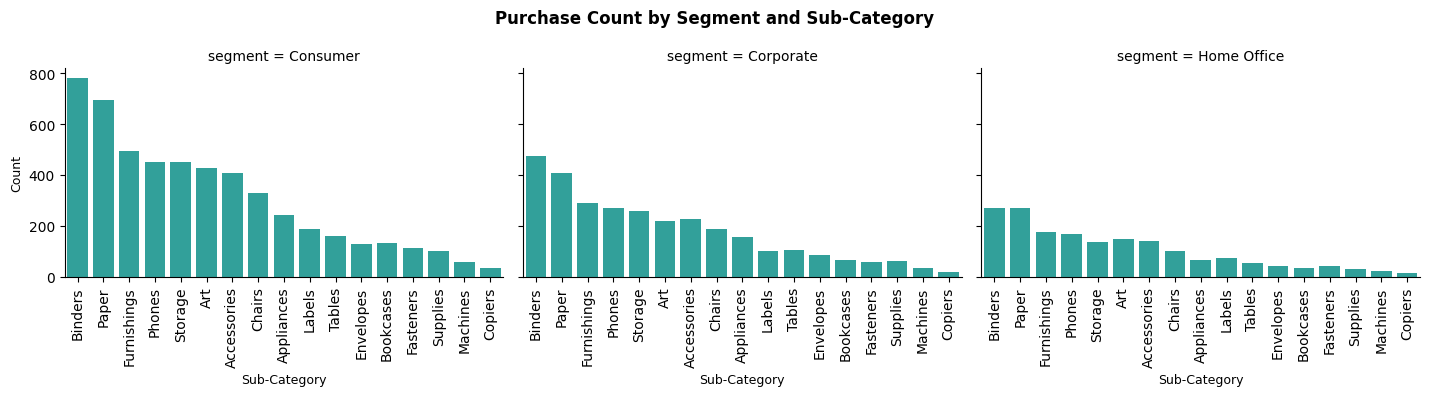

In [309]:
order = (df['sub_category'].value_counts().index)
g = sns.FacetGrid(df, col='segment', height=4, aspect=1.2)
g.map(sns.countplot, 'sub_category', order=order, color= 'LightSeaGreen')
g.set_xticklabels(rotation=90)
g.set_xlabels('Sub-Category', size=9)
g.set_ylabels('Count', size=9)
plt.suptitle('Purchase Count by Segment and Sub-Category', weight='bold')
plt.tight_layout()


### Query

Which are top 1% most purchased products ?

In [311]:
# query = """
# with counts as (
# select i.product_id, p.product_name, p.sub_category, count(*) as quantity
# from order_items i
# join products p on i.product_id = p.product_id
# join orders o on o.order_id = i.order_id
# join customers c on c.customer_id = o.customer_id
# group by i.product_id, p.product_name)

# select * 
# from (
#         select *,
#             percent_rank() over (order by quantity desc) as pct_rank
#         from counts) 
# where pct_rank <= 0.01
# order by quantity desc
# """

# pd.read_sql(query, conn)

What are top 1% most purchased products in each region?

In [312]:
# # WEST

# query = """
# with counts as (
# select i.product_id, p.product_name, p.sub_category, c.region, count(*) as quantity
# from order_items i
# join products p on i.product_id = p.product_id
# join orders o on o.order_id = i.order_id
# join customers c on c.customer_id = o.customer_id
# where c.region = 'West'
# group by i.product_id, p.product_name)

# select * 
# from (
#         select *,
#             percent_rank() over (order by quantity desc) as pct_rank
#         from counts) 
# where pct_rank <= 0.01
# order by quantity desc
# """
# pd.read_sql(query, conn)

### Sub-category nào – cho ai – ở đâu → có khả năng sinh lời cao?

In [ ]:
# df.columns

Index(['order_id', 'order_date', 'ship_date', 'ship_mode', 'customer_id',
       'customer_name', 'segment', 'city', 'state', 'region', 'product_id',
       'category', 'sub_category', 'product_name', 'sales', 'quantity',
       'discount', 'profit', 'ship_days'],
      dtype='object')

xgboost

In [ ]:
# import pandas as pd
# import numpy as np

# from sklearn.model_selection import train_test_split
# from sklearn.preprocessing import OneHotEncoder
# from sklearn.compose import ColumnTransformer
# from sklearn.pipeline import Pipeline
# from sklearn.metrics import mean_squared_error
# from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score


# from xgboost import XGBRegressor

In [ ]:
# target = 'profit'

# cat_features = [
#     'sub_category',
#     'category',
#     'segment',
#     'region',
#     'ship_mode'
# ]

# num_features = [
#     'quantity',
#     'discount',
#     'ship_days'
# ]

# X = df[cat_features + num_features]
# y = df[target]
# X_train, X_test, y_train, y_test = train_test_split(
#     X, y,
#     test_size=0.2,
#     random_state=42
# )

In [ ]:
# preprocess = ColumnTransformer(
#     transformers=[
#         ('cat', OneHotEncoder(handle_unknown='ignore'), cat_features),
#         ('num', 'passthrough', num_features)
#     ]
# )

In [ ]:
# model = XGBRegressor(
#     n_estimators=100,
#     max_depth=10,
#     learning_rate=0.05,
#     subsample=0.8,
#     colsample_bytree=0.8,
#     random_state=42
# )

# pipe = Pipeline(
#     steps=[
#         ('prep', preprocess),
#         ('model', model)
#     ]
# )
# pipe.fit(X_train, y_train)

,"steps steps: list of tuplesList of (name of step, estimator) tuples that are to be chained insequential order. To be compatible with the scikit-learn API, all stepsmust define `fit`. All non-last steps must also define `transform`. See:ref:`Combining Estimators ` for more details.","[('prep', ...), ('model', ...)]"
,"transform_input transform_input: list of str, default=NoneThe names of the :term:`metadata` parameters that should be transformed by thepipeline before passing it to the step consuming it.This enables transforming some input arguments to ``fit`` (other than ``X``)to be transformed by the steps of the pipeline up to the step which requiresthem. Requirement is defined via :ref:`metadata routing `.For instance, this can be used to pass a validation set through the pipeline.You can only set this if metadata routing is enabled, which youcan enable using ``sklearn.set_config(enable_metadata_routing=True)``... versionadded:: 1.6",None
,"memory memory: str or object with the joblib.Memory interface, default=NoneUsed to cache the fitted transformers of the pipeline. The last stepwill never be cached, even if it is a transformer. By default, nocaching is performed. If a string is given, it is the path to thecaching directory. Enabling caching triggers a clone of the transformersbefore fitting. Therefore, the transformer instance given to thepipeline cannot be inspected directly. Use the attribute ``named_steps``or ``steps`` to inspect estimators within the pipeline. Caching thetransformers is advantageous when fitting is time consuming. See:ref:`sphx_glr_auto_examples_neighbors_plot_caching_nearest_neighbors.py`for an example on how to enable caching.",None
,"verbose verbose: bool, default=FalseIf True, the time elapsed while fitting each step will be printed as itis completed.",False
,"transformers transformers: list of tuplesList of (name, transformer, columns) tuples specifying thetransformer objects to be applied to subsets of the data.name : str Like in Pipeline and FeatureUnion, this allows the transformer and its parameters to be set using ``set_params`` and searched in grid search.transformer : {'drop', 'passthrough'} or estimator Estimator must support :term:`fit` and :term:`transform`. Special-cased strings 'drop' and 'passthrough' are accepted as well, to indicate to drop the columns or to pass them through untransformed, respectively.columns : str, array-like of str, int, array-like of int, array-like of bool, slice or callable Indexes the data on its second axis. Integers are interpreted as positional columns, while strings can reference DataFrame columns by name. A scalar string or int should be used where ``transformer`` expects X to be a 1d array-like (vector), otherwise a 2d array will be passed to the transformer. A callable is passed the input data `X` and can return any of the above. To select multiple columns by name or dtype, you can use :obj:`make_column_selector`.","[('cat', ...), ('num', ...)]"
,"remainder remainder: {'drop', 'passthrough'} or estimator, default='drop'By default, only the specified columns in `transformers` aretransformed and combined in the output, and the non-specifiedcolumns are dropped. (default of ``'drop'``).By specifying ``remainder='passthrough'``, all remaining columns thatwere not specified in `transformers`, but present in the data passedto `fit` will be automatically passed through. This subset of columnsis concatenated with the output of the transformers. For dataframes,extra columns not seen during `fit` will be excluded from the outputof `transform`.By setting ``remainder`` to be an estimator, the remainingnon-specified columns will use the ``remainder`` estimator. Theestimator must support :term:`fit` and :term:`transform`.Note that using this feature requires that the DataFrame columnsinput at :term:`fit` and :term:`transform` have identical order.",'drop'
,"sparse_threshold sparse_threshold: float, default=0.3If the output of the different transformers contains s

In [ ]:
# y_pred = pipe.predict(X_test)

# rmse = mean_squared_error(y_test, y_pred) ** 0.5
# mae = mean_absolute_error(y_test, y_pred)
# r2 = r2_score(y_test, y_pred)

# print(f"RMSE: {rmse:.2f}")
# print(f"MAE : {mae:.2f}")
# print(f"R2  : {r2:.3f}")

RMSE: 205.25
MAE : 62.47
R2  : 0.131


In [ ]:

# xgb_model = pipe.named_steps['model']

# importances = xgb_model.feature_importances_

# feature_names = (
#     pipe.named_steps['prep']
#     .get_feature_names_out()
# )

# fi = (
#     pd.DataFrame({
#         'feature': feature_names,
#         'importance': importances
#     })
#     .sort_values('importance', ascending=False)
# )

# fi.head(15)


,feature,importance
6,cat__sub_category_Copiers,0.556137
11,cat__sub_category_Machines,0.100528
32,num__discount,0.048651
13,cat__sub_category_Phones,0.027025
19,cat__category_Technology,0.021510
3,cat__sub_category_Binders,0.017412
31,num__quantity,0.016776
18,cat__category_Office Supplies,0.016516
29,cat__ship_mode_Second Class,0.015160
33,num__ship_days,0.014096


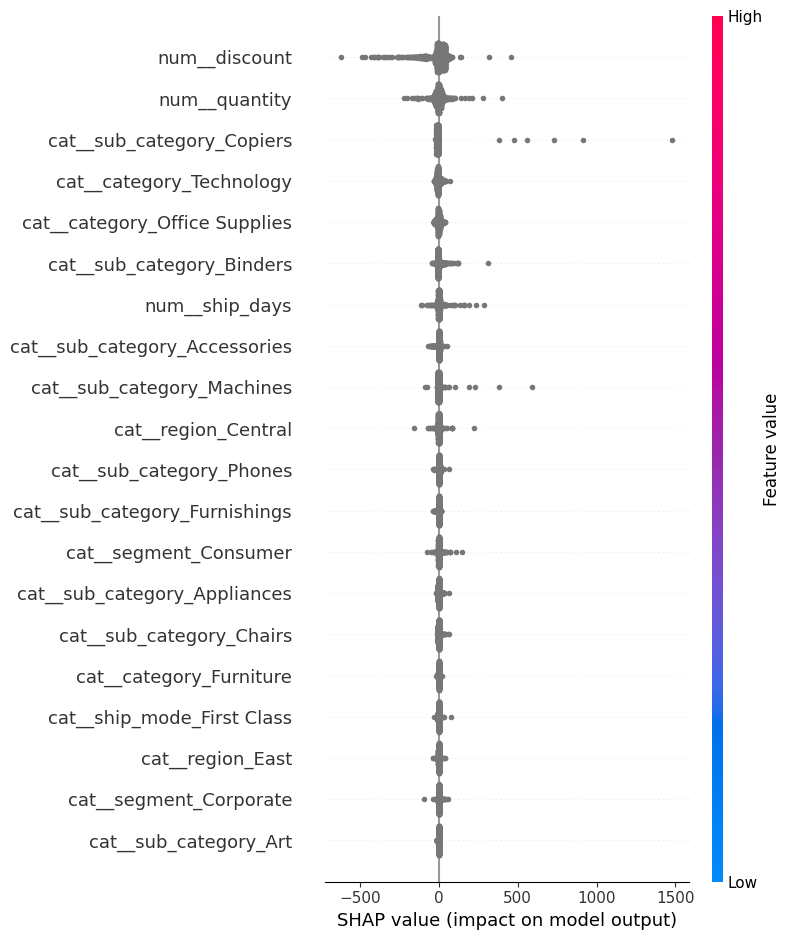

In [ ]:
# import shap

# X_sample = X.sample(1000, random_state=42)

# X_trans = pipe.named_steps['prep'].transform(X_sample)

# explainer = shap.TreeExplainer(xgb_model)
# shap_values = explainer.shap_values(X_trans)

# shap.summary_plot(
#     shap_values,
#     X_trans,
#     feature_names=feature_names
# )


### catboost

In [ ]:
from catboost import CatBoostRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error,r2_score

target = 'profit'

cat_features = [
    'sub_category',
    'category',
    'segment',
    'region',
    'ship_mode'
]

num_features = [
    'quantity',
    'discount',
    'ship_days'
]

features = cat_features + num_features

X = df[features]
y = df[target]

X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.2,
    random_state=42
)
cat_feature_indices = [
    X.columns.get_loc(col) for col in cat_features
]



In [554]:
def clip(s, lower_q=None, upper_q=None):
    s = s.copy()
    if lower_q is not None:
        lower = s.quantile(lower_q)
    else:
        lower = None
        
    if upper_q is not None:
        upper = s.quantile(upper_q)
    else:
        upper = None
        
    return s.clip(lower=lower, upper=upper)


In [555]:
df["sales_clipped"] = clip(df["sales"], 0.005, 0.995)
df["profit_clipped"] = clip(df["profit"], 0.005, 0.995)

In [556]:
def clip_stats(s, lower_q=None, upper_q=None):
    lower = s.quantile(lower_q) if lower_q is not None else None
    upper = s.quantile(upper_q) if upper_q is not None else None

    n_low = (s < lower).sum() if lower is not None else 0
    n_high = (s > upper).sum() if upper is not None else 0

    return {
        "lower_bound": lower,
        "upper_bound": upper,
        "n_clipped_low": n_low,
        "n_clipped_high": n_high,
        "n_clipped_total": n_low + n_high,
        "pct_clipped": (n_low + n_high) / len(s) * 100
    }


In [557]:
sales_stats = clip_stats(df["sales"], 0.005, 0.995)
profit_stats = clip_stats(df["profit"], 0.005, 0.995)


clip_summary = pd.DataFrame.from_dict(
    {
        "sales": sales_stats,
        "profit": profit_stats,
    },
    orient="index"
)

clip_summary

,lower_bound,upper_bound,n_clipped_low,n_clipped_high,n_clipped_total,pct_clipped
sales,1.728000,3394.0587,49,50,99,0.990594
profit,-481.245983,843.1706,50,49,99,0.990594


In [576]:
from catboost import CatBoostRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

target = 'sales_clipped'

cat_features = [
    'customer_id',
    'product_id',
    'sub_category',
    'category',
    'segment',
    'region',
    'ship_mode'
]

num_features = [
    'discount',
    'ship_days'
]

features = cat_features + num_features

X = df[features]
y = df[target]

X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.2,
    random_state=42
)
cat_feature_indices = [
    X.columns.get_loc(col) for col in cat_features
]


In [568]:
import optuna


In [569]:
def objective(trial):

    params = {
        'iterations': trial.suggest_int('iterations', 300, 800),
        'depth': trial.suggest_int('depth', 4, 10),
        'learning_rate': trial.suggest_float('learning_rate', 0.01, 0.1, log=True),
        'l2_leaf_reg': trial.suggest_int('l2_leaf_reg', 1, 10),
        'bagging_temperature': trial.suggest_float('bagging_temperature', 0, 3),
        'random_strength': trial.suggest_float('random_strength', 0, 3),
        'loss_function': 'RMSE',
        'eval_metric': 'R2',
        'random_seed': 81,
        'verbose': 0
    }

    model = CatBoostRegressor(**params)

    model.fit(
        X_train, y_train,
        cat_features=cat_feature_indices,
        eval_set=(X_test, y_test),
        early_stopping_rounds=50
    )

    preds = model.predict(X_test)
    r2 = r2_score(y_test, preds)

    print(
        f"Trial {trial.number} | R2: {r2:.4f} | "
        f"depth={params['depth']} | "
        f"lr={params['learning_rate']:.4f} | "
        f"iter={params['iterations']}"
    )

    return r2


In [577]:
study = optuna.create_study(direction='maximize')
study.optimize(objective, n_trials=10)


[I 2026-01-24 21:57:41,350] A new study created in memory with name: no-name-3c022479-7d8f-4a40-b505-aece211fe696
[I 2026-01-24 21:57:53,543] Trial 0 finished with value: 0.33673486125317975 and parameters: {'iterations': 785, 'depth': 4, 'learning_rate': 0.012173882971942768, 'l2_leaf_reg': 7, 'bagging_temperature': 2.7151992696483376, 'random_strength': 2.4686887502930404}. Best is trial 0 with value: 0.33673486125317975.


Trial 0 | R2: 0.3367 | depth=4 | lr=0.0122 | iter=785


[I 2026-01-24 21:58:03,810] Trial 1 finished with value: 0.3294752255262121 and parameters: {'iterations': 648, 'depth': 4, 'learning_rate': 0.011643980902821281, 'l2_leaf_reg': 10, 'bagging_temperature': 1.1971077333355433, 'random_strength': 2.6988530257550143}. Best is trial 0 with value: 0.33673486125317975.


Trial 1 | R2: 0.3295 | depth=4 | lr=0.0116 | iter=648


[I 2026-01-24 21:58:23,895] Trial 2 finished with value: 0.3482073301178824 and parameters: {'iterations': 600, 'depth': 8, 'learning_rate': 0.052188089075096734, 'l2_leaf_reg': 8, 'bagging_temperature': 2.2200272904103624, 'random_strength': 0.936807745301444}. Best is trial 2 with value: 0.3482073301178824.


Trial 2 | R2: 0.3482 | depth=8 | lr=0.0522 | iter=600


[I 2026-01-24 21:58:53,801] Trial 3 finished with value: 0.34812200510564684 and parameters: {'iterations': 664, 'depth': 9, 'learning_rate': 0.021576879651497606, 'l2_leaf_reg': 5, 'bagging_temperature': 0.2407983169874791, 'random_strength': 1.604180330853568}. Best is trial 2 with value: 0.3482073301178824.


Trial 3 | R2: 0.3481 | depth=9 | lr=0.0216 | iter=664


[I 2026-01-24 21:59:04,680] Trial 4 finished with value: 0.35668163202424885 and parameters: {'iterations': 755, 'depth': 4, 'learning_rate': 0.05374876786294284, 'l2_leaf_reg': 10, 'bagging_temperature': 1.2333503031209165, 'random_strength': 0.3199676562359277}. Best is trial 4 with value: 0.35668163202424885.


Trial 4 | R2: 0.3567 | depth=4 | lr=0.0537 | iter=755


[I 2026-01-24 21:59:14,811] Trial 5 finished with value: 0.33972168527857605 and parameters: {'iterations': 415, 'depth': 6, 'learning_rate': 0.020998104997913148, 'l2_leaf_reg': 10, 'bagging_temperature': 1.297779063646468, 'random_strength': 2.0976464617154793}. Best is trial 4 with value: 0.35668163202424885.


Trial 5 | R2: 0.3397 | depth=6 | lr=0.0210 | iter=415


[I 2026-01-24 21:59:32,550] Trial 6 finished with value: 0.3498667173867437 and parameters: {'iterations': 719, 'depth': 6, 'learning_rate': 0.040460296653602436, 'l2_leaf_reg': 8, 'bagging_temperature': 0.8725345462101757, 'random_strength': 0.14842278428171696}. Best is trial 4 with value: 0.35668163202424885.


Trial 6 | R2: 0.3499 | depth=6 | lr=0.0405 | iter=719


[I 2026-01-24 22:00:04,434] Trial 7 finished with value: 0.34042728509609055 and parameters: {'iterations': 567, 'depth': 9, 'learning_rate': 0.014659732993916406, 'l2_leaf_reg': 7, 'bagging_temperature': 0.6432142194245416, 'random_strength': 0.28303508021744506}. Best is trial 4 with value: 0.35668163202424885.


Trial 7 | R2: 0.3404 | depth=9 | lr=0.0147 | iter=567


[I 2026-01-24 22:00:12,141] Trial 8 finished with value: 0.3527433985077082 and parameters: {'iterations': 602, 'depth': 4, 'learning_rate': 0.09618716347222737, 'l2_leaf_reg': 4, 'bagging_temperature': 2.2450124358011845, 'random_strength': 1.2787732246025953}. Best is trial 4 with value: 0.35668163202424885.


Trial 8 | R2: 0.3527 | depth=4 | lr=0.0962 | iter=602


[I 2026-01-24 22:00:29,606] Trial 9 finished with value: 0.3420721002895867 and parameters: {'iterations': 697, 'depth': 4, 'learning_rate': 0.012839917124645928, 'l2_leaf_reg': 2, 'bagging_temperature': 1.9942853464031987, 'random_strength': 1.335903478717243}. Best is trial 4 with value: 0.35668163202424885.


Trial 9 | R2: 0.3421 | depth=4 | lr=0.0128 | iter=697


In [578]:
best_params = study.best_params
print(best_params)


{'iterations': 755, 'depth': 4, 'learning_rate': 0.05374876786294284, 'l2_leaf_reg': 10, 'bagging_temperature': 1.2333503031209165, 'random_strength': 0.3199676562359277}


In [579]:
best_model = CatBoostRegressor(
    **best_params,
    loss_function='RMSE',
    random_seed=81,
    verbose=0
)

best_model.fit(
    X_train, y_train,
    cat_features=cat_feature_indices
)


In [580]:
y_pred_train = best_model.predict(X_train)
y_pred_test  = best_model.predict(X_test)


In [581]:
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
import numpy as np

metrics = {
    'train_r2': r2_score(y_train, y_pred_train),
    'test_r2':  r2_score(y_test, y_pred_test),
    'train_rmse': np.sqrt(mean_squared_error(y_train, y_pred_train)),
    'test_rmse':  np.sqrt(mean_squared_error(y_test, y_pred_test)),
    'train_mae': mean_absolute_error(y_train, y_pred_train),
    'test_mae':  mean_absolute_error(y_test, y_pred_test)
}

for k, v in metrics.items():
    print(f"{k}: {v:.4f}")


train_r2: 0.4781
test_r2: 0.3567
train_rmse: 305.7527
test_rmse: 386.8822
train_mae: 141.1511
test_mae: 159.5083


In [582]:
best_model.get_feature_importance(prettified=True)


,Feature Id,Importances
0,sub_category,43.794973
1,product_id,28.447081
2,discount,10.276953
3,category,6.565178
4,ship_mode,2.747569
5,region,2.697073
6,customer_id,2.116605
7,segment,1.910519
8,ship_days,1.444049


In [805]:
df_ = df.copy()
bins = [0, 0.01, 0.05, 0.10, 0.15, 0.20, 0.25, 0.30, 0.40, 1.0]
labels = [
    "0%", "1–5%", "5–10%", "10–15%", "15–20%",
    "20–25%", "25–30%", "30–40%", "40%+"
]

df_["discount_bin"] = pd.cut(
    df["discount"],
    bins=bins,
    labels=labels,
    include_lowest=True
)
df_['profit'] = df['profit']
df_['sales'] = df['sales']


In [806]:
interaction_suca = (
    df_
    .groupby(["sub_category", "discount_bin"])
    .agg(
        sum_profit=("profit", "sum"),
        loss_rate=("profit", lambda x: (x < 0).mean() * 100),
        n_orders=("profit", "count"),
        quantity=("quantity", "sum")
    )
    .reset_index()
)

interaction_suca["profit_per_order"] = interaction_suca["sum_profit"] / interaction_suca["n_orders"]

interaction_suca.sort_values(
    ["sub_category", "profit_per_order"],
    ascending=[True, False]
)

C:\Users\Asus\AppData\Local\Temp\ipykernel_25496\641247274.py:3: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  .groupby(["sub_category", "discount_bin"])


,sub_category,discount_bin,sum_profit,loss_rate,n_orders,quantity,profit_per_order
0,Accessories,0%,35289.2539,0.000000,471,1835,74.924106
4,Accessories,15–20%,6647.3818,29.934211,304,1141,21.866388
1,Accessories,1–5%,0.0000,NaN,0,0,NaN
2,Accessories,5–10%,0.0000,NaN,0,0,NaN
3,Accessories,10–15%,0.0000,NaN,0,0,NaN
...,...,...,...,...,...,...,...
152,Tables,40%+,-11108.4984,100.000000,47,178,-236.351030
145,Tables,1–5%,0.0000,NaN,0,0,NaN
146,Tables,5–10%,0.0000,NaN,0,0,NaN
147,Tables,10–15%,0.0000,NaN,0,0,NaN


In [808]:
baseline_0 = (
    interaction_suca
    [interaction_suca["discount_bin"] == "0%"]
    [["sub_category", "quantity"]]
    .rename(columns={"quantity": "q_0"})
)

interaction_ = interaction_suca.merge(
    baseline_0,
    on="sub_category",
    how="left"
)

best_rate = interaction_[
    interaction_["quantity"] > interaction_["q_0"]
]
best_rate
best_rate.loc[best_rate['sum_profit'] >=0, :]

,sub_category,discount_bin,sum_profit,loss_rate,n_orders,quantity,profit_per_order,q_0
31,Binders,15–20%,29417.8090,0.000000,573,2227,51.339981,1291
49,Chairs,15–20%,4283.1750,33.200000,250,889,17.132700,540
58,Copiers,15–20%,17878.7148,0.000000,37,119,483.208508,82
121,Phones,15–20%,16536.3067,8.315565,469,1773,35.258650,1102


In [809]:
from scipy.stats import mannwhitneyu

def test_discount_quantity(df, subcat, low=0.15, high=0.20):
    df_sub = df[df["sub_category"] == subcat]

    q_0 = df_sub[df_sub["discount"] == 0]["quantity"]
    q_d = df_sub[
        (df_sub["discount"] > low) &
        (df_sub["discount"] <= high)
    ]["quantity"]

    if len(q_0) < 30 or len(q_d) < 30:
        return None  # sample quá nhỏ, không test

    stat, p_value = mannwhitneyu(
        q_d,
        q_0,
        alternative="greater"
    )

    return {
        "sub_category": subcat,
        "n_0": len(q_0),
        "n_d": len(q_d),
        "p_value": p_value
    }


In [810]:
results = []

for subcat in ["Binders", "Chairs", "Copiers", "Phones"]:
    r = test_discount_quantity(df, subcat)
    if r:
        results.append(r)

pd.DataFrame(results)


,sub_category,n_0,n_d,p_value
0,Binders,337,573,0.454899
1,Chairs,133,250,0.930385
2,Phones,311,469,0.032375


In [641]:
df_sub = df[df["sub_category"] == "Phones"]

avg_0 = df_sub.loc[df_sub['discount']==0, 'quantity'].mean()
avg_d = df_sub.loc[(df_sub["discount"] > 0.15) & (df_sub["discount"] <= 0.20), 'quantity'].mean()

avg_0, avg_d


(np.float64(3.5434083601286175), np.float64(3.7803837953091683))

In [621]:
# tỷ lệ order mua trên >= 4 phones có tăng lên khi áp dụng giảm giá không
def large_order_rate(q, threshold=4):
    return (q >= threshold).mean() * 100

df_sub = df[df["sub_category"] == "Phones"]

rate_0 = large_order_rate(df_sub[df_sub["discount"] == 0]["quantity"])
rate_d = large_order_rate(
    df_sub[(df_sub["discount"] > 0.15) & (df_sub["discount"] <= 0.20)]["quantity"]
)

rate_0, rate_d


(np.float64(37.29903536977492), np.float64(43.71002132196162))

discount sales interaction

In [811]:
interaction_suca = (
    df_
    .groupby(["sub_category", "discount_bin"])
    .agg(
        sum_profit=("profit", "sum"),
        loss_rate=("profit", lambda x: (x < 0).mean() * 100),
        n_orders=("profit", "count"),
        quantity=("quantity", "sum"),
        sum_sales=('sales', 'sum')
    )
    .reset_index()
)

#interaction_suca["profit_per_order"] = interaction_suca["sum_profit"] / interaction_suca["n_orders"]

interaction_suca.sort_values(
    ["sub_category", "sum_sales"],
    ascending=[True, False]
)

C:\Users\Asus\AppData\Local\Temp\ipykernel_25496\2256997904.py:3: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  .groupby(["sub_category", "discount_bin"])


,sub_category,discount_bin,sum_profit,loss_rate,n_orders,quantity,sum_sales
0,Accessories,0%,35289.2539,0.000000,471,1835,118370.310
4,Accessories,15–20%,6647.3818,29.934211,304,1141,49010.008
1,Accessories,1–5%,0.0000,NaN,0,0,0.000
2,Accessories,5–10%,0.0000,NaN,0,0,0.000
3,Accessories,10–15%,0.0000,NaN,0,0,0.000
...,...,...,...,...,...,...,...
152,Tables,40%+,-11108.4984,100.000000,47,178,19159.984
145,Tables,1–5%,0.0000,NaN,0,0,0.000
146,Tables,5–10%,0.0000,NaN,0,0,0.000
147,Tables,10–15%,0.0000,NaN,0,0,0.000


In [812]:
baseline_0 = (
    interaction_suca
    [interaction_suca["discount_bin"] == "0%"]
    [["sub_category", "sum_sales"]]
    .rename(columns={"sum_sales": "q_0"})
)

interaction_ = interaction_suca.merge(
    baseline_0,
    on="sub_category",
    how="left"
)

best_rate = interaction_[
    interaction_["sum_sales"] > interaction_["q_0"]
]
best_rate
best_rate.loc[best_rate['sum_profit'] >=0, :]

,sub_category,discount_bin,sum_profit,loss_rate,n_orders,quantity,sum_sales,q_0
31,Binders,15–20%,29417.8090,0.000000,573,2227,85442.640,81829.48
49,Chairs,15–20%,4283.1750,33.200000,250,889,120748.624,91060.73
121,Phones,15–20%,16536.3067,8.315565,469,1773,171789.992,123879.71


In [819]:
from scipy.stats import mannwhitneyu

def test_discount_sales(df, subcat, low=0.15, high=0.20):
    df_sub = df[df["sub_category"] == subcat]

    q_0 = df_sub[df_sub["discount"] == 0]["sales"]
    q_d = df_sub[
        (df_sub["discount"] > low) &
        (df_sub["discount"] <= high)]["sales"]

    # if len(q_0) < 30 or len(q_d) < 30:
    #     return None  # sample quá nhỏ, không test

    stat, p_value = mannwhitneyu(
        q_d,
        q_0,
        alternative="greater"
    )

    return {
        "sub_category": subcat,
        "n_0": len(q_0),
        "n_d": len(q_d),
        "p_value": p_value
    }


In [820]:
results = []

for subcat in ["Binders", "Chairs", "Phones"]:
    r = test_discount_sales(df, subcat)
    if r:
        results.append(r)

pd.DataFrame(results)

,sub_category,n_0,n_d,p_value
0,Binders,337,573,0.994836
1,Chairs,133,250,0.999222
2,Phones,311,469,0.793941


discount product_id interaction

In [743]:
df_ = df.copy()
interaction_suca = (
    df_
    .groupby(["product_id", "discount_bin"])
    .agg(
        sum_profit=("profit", "sum"),
        loss_rate=("profit", lambda x: (x < 0).mean() * 100),
        n_orders=("profit", "count"),
        quantity=("quantity", "sum")
    )
    .reset_index()
)
interaction_suca["profit_per_order"] = interaction_suca["sum_profit"] / interaction_suca["n_orders"]

interaction_suca

C:\Users\Asus\AppData\Local\Temp\ipykernel_25496\490848939.py:4: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  .groupby(["product_id", "discount_bin"])


,product_id,discount_bin,sum_profit,loss_rate,n_orders,quantity,profit_per_order
0,FUR-BO-10000112,0%,0.0000,NaN,0,0,NaN
1,FUR-BO-10000112,1–5%,0.0000,NaN,0,0,NaN
2,FUR-BO-10000112,5–10%,0.0000,NaN,0,0,NaN
3,FUR-BO-10000112,10–15%,0.0000,NaN,0,0,NaN
4,FUR-BO-10000112,15–20%,0.0000,NaN,0,0,NaN
...,...,...,...,...,...,...,...
16753,TEC-PH-10004977,15–20%,370.4211,0.0,5,21,74.08422
16754,TEC-PH-10004977,20–25%,0.0000,NaN,0,0,NaN
16755,TEC-PH-10004977,25–30%,0.0000,NaN,0,0,NaN
16756,TEC-PH-10004977,30–40%,-43.1178,100.0,1,2,-43.11780


In [ ]:
baseline_0 = (
    interaction_suca
    [interaction_suca["discount_bin"] == "0%"]
    [["sub_category", "quantity"]]
    .rename(columns={"quantity": "q_0"})
)

interaction_ = interaction_suca.merge(
    baseline_0,
    on="sub_category",
    how="left"
)

best_rate = interaction_[
    interaction_["quantity"] > interaction_["q_0"]
]
best_rate
best_rate.loc[best_rate['sum_profit'] >=0, :]

In [ ]:
from scipy.stats import mannwhitneyu

def test_discount_quantity(df, subcat, low=0.15, high=0.20):
    df_sub = df[df["sub_category"] == subcat]

    q_0 = df_sub[df_sub["discount"] == 0]["quantity"]
    q_d = df_sub[
        (df_sub["discount"] > low) &
        (df_sub["discount"] <= high)
    ]["quantity"]

    if len(q_0) < 30 or len(q_d) < 30:
        return None  # sample quá nhỏ, không test

    stat, p_value = mannwhitneyu(
        q_d,
        q_0,
        alternative="greater"
    )

    return {
        "sub_category": subcat,
        "n_0": len(q_0),
        "n_d": len(q_d),
        "p_value": p_value
    }


In [744]:
baseline_0 = (
    interaction_suca
    [interaction_suca["discount_bin"] == "0%"]
    [["product_id", "quantity"]]
    .rename(columns={"quantity": "no_0"})
)

interaction_ = interaction_suca.merge(
    baseline_0,
    on="product_id",
    how="left"
)

best_rate = interaction_[
    (interaction_["quantity"] > interaction_["no_0"]) & interaction_['loss_rate'] == 0 
]
best_rate = best_rate.loc[best_rate['sum_profit'] >=0, :].sort_values('product_id')
best_rate

,product_id,discount_bin,sum_profit,loss_rate,n_orders,quantity,profit_per_order,no_0
0,FUR-BO-10000112,0%,0.0000,NaN,0,0,NaN,0
1,FUR-BO-10000112,1–5%,0.0000,NaN,0,0,NaN,0
2,FUR-BO-10000112,5–10%,0.0000,NaN,0,0,NaN,0
3,FUR-BO-10000112,10–15%,0.0000,NaN,0,0,NaN,0
4,FUR-BO-10000112,15–20%,0.0000,NaN,0,0,NaN,0
...,...,...,...,...,...,...,...,...
16751,TEC-PH-10004977,5–10%,0.0000,NaN,0,0,NaN,9
16752,TEC-PH-10004977,10–15%,0.0000,NaN,0,0,NaN,9
16753,TEC-PH-10004977,15–20%,370.4211,0.0,5,21,74.08422,9
16754,TEC-PH-10004977,20–25%,0.0000,NaN,0,0,NaN,9


In [747]:
best_rate = best_rate.loc[best_rate['discount_bin'] != '0%']

best_rate_up = best_rate.loc[best_rate['no_0'] != 0]
best_rate_new = best_rate.loc[(best_rate['no_0'] == 0) & (best_rate['quantity'] != 0)]

best_rate_up['quan_uplift'] = ((best_rate_up['quantity'] - best_rate_up['no_0'])/best_rate_up['no_0'])

best_rate_up = best_rate_up.loc[best_rate_up['quan_uplift'] >=10, :]
best_rate_up.sort_values('quan_uplift', ascending=False)

C:\Users\Asus\AppData\Local\Temp\ipykernel_25496\2382615886.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  best_rate_up['quan_uplift'] = ((best_rate_up['quantity'] - best_rate_up['no_0'])/best_rate_up['no_0'])


,product_id,discount_bin,sum_profit,loss_rate,n_orders,quantity,profit_per_order,no_0,quan_uplift
16591,TEC-PH-10004531,15–20%,167.9520,0.0,5,21,33.590400,1,20.0
7654,OFF-EN-10000927,15–20%,161.5050,0.0,3,18,53.835000,1,17.0
15304,TEC-PH-10000576,15–20%,143.8395,0.0,5,15,28.767900,1,14.0
6313,OFF-BI-10001628,15–20%,78.2250,0.0,7,30,11.175000,2,14.0
6700,OFF-BI-10002706,15–20%,51.9792,0.0,4,14,12.994800,1,13.0
10579,OFF-PA-10002581,15–20%,216.8600,0.0,5,28,43.372000,2,13.0
15781,TEC-PH-10002085,15–20%,51.4722,0.0,3,13,17.157400,1,12.0
16492,TEC-PH-10004100,15–20%,35.9800,0.0,5,25,7.196000,2,11.5
15682,TEC-PH-10001817,15–20%,601.4400,0.0,7,24,85.920000,2,11.0
11191,OFF-PA-10004000,15–20%,16.4604,0.0,3,12,5.486800,1,11.0


In [748]:
best_rate_new

,product_id,discount_bin,sum_profit,loss_rate,n_orders,quantity,profit_per_order,no_0
84,FUR-BO-10001601,10–15%,10.4784,0.0,1,2,10.4784,0
120,FUR-BO-10001811,10–15%,225.7350,0.0,1,5,225.7350,0
121,FUR-BO-10001811,15–20%,120.3920,0.0,2,4,60.1960,0
202,FUR-BO-10002613,15–20%,365.2740,0.0,3,13,121.7580,0
201,FUR-BO-10002613,10–15%,295.0290,0.0,2,7,147.5145,0
...,...,...,...,...,...,...,...,...
16465,TEC-PH-10004080,15–20%,38.0744,0.0,2,7,19.0372,0
16528,TEC-PH-10004241,15–20%,143.9968,0.0,1,4,143.9968,0
16546,TEC-PH-10004348,15–20%,11.0940,0.0,1,3,11.0940,0
16663,TEC-PH-10004830,15–20%,22.6764,0.0,1,4,22.6764,0


In [749]:
best_rate_both = pd.concat([best_rate_new, best_rate_up], axis=0, ignore_index=True)
best_rate_both.discount_bin.value_counts()


discount_bin
15–20%    175
5–10%      12
10–15%      7
25–30%      7
30–40%      6
0%          0
1–5%        0
20–25%      0
40%+        0
Name: count, dtype: int64

In [764]:
rate_1 = best_rate_both.loc[best_rate_both['discount_bin'] == '5–10%',:]
rate_2 = best_rate_both.loc[best_rate_both['discount_bin'] == '10–15%',:]
rate_3 = best_rate_both.loc[best_rate_both['discount_bin'] == '15–20%',:]
rate_4 = best_rate_both.loc[best_rate_both['discount_bin'] == '25–30%',:]
rate_5 = best_rate_both.loc[best_rate_both['discount_bin'] == '30–40%',:]

In [796]:
def pvalue(df, i, low=0.15, high=0.20):
    df_sub = df[df["product_id"] == i]

    q_0 = df_sub[df_sub["discount"] == 0]["quantity"]
    q_d = df_sub[
        (df_sub["discount"] > low) &
        (df_sub["discount"] <= high)
    ]["quantity"]

    if len(q_0) < 2 or len(q_d) < 2:
        return None  # sample quá nhỏ, không test

    stat, p_value = mannwhitneyu(
        q_d,
        q_0,
        alternative="greater"
    )

    return {
        "product_id": i,
        "n_0": len(q_0),
        "n_d": len(q_d),
        "median_0": q_0.median(),
        "median_d": q_d.median(),
        "uplift_median": q_d.median() - q_0.median(),
        "p_value": p_value
    }


In [800]:
df_sub = df[df["product_id"] == 'FUR-BO-10001601']

q_0 = df_sub[df_sub["discount"] == 0]["quantity"]

q_0

q_d = df_sub[
        (df_sub["discount"] > 0.1) &
        (df_sub["discount"] <= 0.15)]["quantity"]
q_d

472    2
Name: quantity, dtype: int64

In [797]:
result_1 = []

id = rate_1['product_id'].unique()

for i in id:
    r = pvalue(df, i, low=0.05, high=0.1)
    if r:
        result_1.append(r)

pd.DataFrame(result_1)

""


In [789]:
result_2 = []

id = rate_2['product_id'].unique()

for i in id:
    r = pvalue(df, i, low=0.1, high=0.15)
    if r:
        result_2.append(r)

pd.DataFrame(result_2)

""


In [795]:
result_3 = []

id = rate_3['product_id'].unique()

for i in id:
    r = pvalue(df, i, low=0.15, high=0.20)
    if r:
        result_3.append(r)

pd.DataFrame(result_3)

""


In [792]:
result_4 = []

id = rate_4['product_id'].unique()

for i in id:
    r = pvalue(df, i, low=0.25, high=0.30)
    if r:
        result_4.append(r)

pd.DataFrame(result_4)

""


In [793]:
result_5 = []

id = rate_5['product_id'].unique()

for i in id:
    r = pvalue(df, i, low=0.30, high=0.40)
    if r:
        result_5.append(r)

pd.DataFrame(result_5)

""


In [ ]:
# from sklearn.model_selection import RandomizedSearchCV

# params = []
# acc = []
# model = CatBoostRegressor()

# param_dist = {
#     'iterations': [300, 500, 800],
#     'depth': [6, 8, 10],
#     'learning_rate': [0.01, 0.03, 0.05, 0.1],
#     'l2_leaf_reg': [1, 3, 5, 7],
#     'bagging_temperature': [0, 1, 3]
# }


# random_search = RandomizedSearchCV(
#     estimator=model,
#     param_distributions=param_dist,
#     n_iter=1000,            
#     scoring='r2',
#     cv=5,
#     verbose=2,
#     random_state=81,
#     n_jobs=-1
# )

# random_search.fit(X_train, y_train)

# params.append(random_search.best_params_)

# best_model = random_search.best_estimator_
# y_pred_test = best_model.predict(X_test)
# y_pred_train = best_model.predict(X_train)

# test_r2 = r2_score(y_test, y_pred_test)
# train_r2 = r2_score(y_train, y_pred_train)

# train_mse = mean_squared_error(y_train, y_pred_train)
# test_mse  = mean_squared_error(y_test, y_pred_test)

# acc.append({
#     'train_r2': train_r2,
#     'test_r2': test_r2,
#     'train_mse': train_mse,
#     'test_mse': test_mse
# })
    
# params_df = pd.DataFrame(params)
# acc_df = pd.DataFrame(acc)

In [ ]:
# y_train_log = np.log1p(y_train)
# y_test_log  = np.log1p(y_test)


In [ ]:
# from sklearn.model_selection import ParameterSampler
# from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
# from catboost import CatBoostRegressor
# import numpy as np

# # =======================
# # 1. Hyperparameter space
# # =======================
# param_dist = {
#     'iterations': [500],
#     'depth': [8],
#     'learning_rate': [0.03],
#     'l2_leaf_reg': [1],
#     'min_data_in_leaf': [10],
#     'bagging_temperature': [1]
# }

# param_list = list(ParameterSampler(
#     param_dist,
#     n_iter=20,
#     random_state=42
# ))

# # =======================
# # 2. Search loop
# # =======================
# best_rmse = np.inf
# best_model = None
# best_params = None

# for params in param_list:
#     model = CatBoostRegressor(
#         **params,
#         loss_function='RMSE',
#         eval_metric='RMSE',
#         random_seed=81,
#         verbose=0
#     )

#     model.fit(
#         X_train,
#         y_train,
#         cat_features=cat_feature_indices, 
#         eval_set=(X_test, y_test),
#         use_best_model=True
#     )

#     y_pred = model.predict(X_test)

#     rmse = mean_squared_error(y_test, y_pred)

#     if rmse < best_rmse:
#         best_rmse = rmse
#         best_model = model
#         best_params = params

# # =======================
# # 3. Evaluate best model
# # =======================
# y_pred = best_model.predict(X_test)

# rmse = mean_squared_error(y_test, y_pred)
# mae  = mean_absolute_error(y_test, y_pred)
# r2   = r2_score(y_test, y_pred)

# print("===== BEST PARAMETERS =====")
# print(best_params)

# print("\n===== BEST MODEL PERFORMANCE =====")
# print(f"RMSE: {rmse:.2f}")
# print(f"MAE : {mae:.2f}")
# print(f"R2  : {r2:.3f}")


C:\Users\Asus\AppData\Roaming\Python\Python311\site-packages\sklearn\model_selection\_search.py:324: UserWarning: The total space of parameters 1 is smaller than n_iter=20. Running 1 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(


===== BEST PARAMETERS =====
{'min_data_in_leaf': 10, 'learning_rate': 0.03, 'l2_leaf_reg': 1, 'iterations': 500, 'depth': 8, 'bagging_temperature': 1}

===== BEST MODEL PERFORMANCE =====
RMSE: 36181.02
MAE : 58.44
R2  : 0.254


In [ ]:
# fi = pd.DataFrame({
#     'feature': X.columns,
#     'importance': model.get_feature_importance()
# }).sort_values('importance', ascending=False)

# fi.head(10)

,feature,importance
0,sub_category,30.397304
6,discount,23.515847
5,quantity,16.307220
7,ship_days,8.580384
2,segment,6.165621
1,category,6.104379
3,region,6.039615
4,ship_mode,2.889631


In [ ]:
# borders_dict = model.get_borders()
# feature_names = model.feature_names_

# rows = []

# for feat_idx, borders in borders_dict.items():
#     rows.append({
#         "feature_index": feat_idx,
#         "feature_name": feature_names[feat_idx],
#         "borders": borders,
#         "n_bins": len(borders) + 1
#     })

# borders_df = pd.DataFrame(rows)
# borders_df


,feature_index,feature_name,borders,n_bins
0,5,quantity,"[1.5, 2.5, 3.5, 4.5, 5.5, 6.5, 7.5, 8.5, 9.5, ...",14
1,6,discount,"[0.05000000074505806, 0.125, 0.175000011920928...",12
2,7,ship_days,"[0.5, 1.5, 2.5, 3.5, 4.5, 5.5, 6.5]",8


In [ ]:
# from catboost import Pool

# train_pool = Pool(
#     X_train,
#     y_train,   
#     cat_features=cat_feature_indices,
#     feature_names=X_train.columns.tolist()
# )

# test_pool = Pool(
#     X_test,
#     y_test,    
#     cat_features=cat_feature_indices,
#     feature_names=X_test.columns.tolist()
# )
# obj_importance = model.get_object_importance(
#     test_pool,
#     train_pool
# )


In [ ]:
# rows = []

# train_indices, influences = obj_importance

# for test_idx in range(len(train_indices)):
#     rows.append({
#         "test_index": test_idx,
#         "train_index": int(train_indices[test_idx]),
#         "influence": influences[test_idx]
#     })

# obj_imp_df = pd.DataFrame(rows)
# obj_imp_df.sort_values('influence', ascending=True)
# obj_imp_df
# #### lấy ra top 1000(?) và tìm pattern?


,test_index,train_index,influence
0,0,1910,-455.558583
1,1,1064,433.815396
2,2,1134,255.842945
3,3,5475,172.455379
4,4,5420,139.265752
...,...,...,...
7990,7990,5593,0.000075
7991,7991,1574,0.000073
7992,7992,3098,-0.000067
7993,7993,2237,-0.000041


In [ ]:
# model = CatBoostRegressor(
#     iterations=100,
#     depth=10,
#     learning_rate=0.02,
#     loss_function='RMSE',
#     eval_metric='RMSE',
#     random_seed=42,
#     verbose=100
# )

In [ ]:
# model.fit(
#     X_train,
#     y_train,
#     cat_features=cat_feature_indices,
#     eval_set=(X_test, y_test),
#     use_best_model=True
# )


0:	learn: 236.6405164	test: 219.9525068	best: 219.9525068 (0)	total: 30.4ms	remaining: 3.01s
99:	learn: 179.4760216	test: 201.7691686	best: 201.7691686 (99)	total: 3.09s	remaining: 0us

bestTest = 201.7691686
bestIteration = 99



In [ ]:
# y_pred = model.predict(X_test)
# rmse = mean_squared_error(y_test, y_pred) ** 0.5
# mae = mean_absolute_error(y_test, y_pred)
# r2 = r2_score(y_test, y_pred)

# print(f"RMSE: {rmse:.2f}")
# print(f"MAE : {mae:.2f}")
# print(f"R2  : {r2:.3f}")

RMSE: 201.77
MAE : 59.84
R2  : 0.160


In [ ]:
# fi = pd.DataFrame({
#     'feature': X.columns,
#     'importance': model.get_feature_importance()
# }).sort_values('importance', ascending=False)

# fi.head(10)


,feature,importance
0,sub_category,22.165108
6,discount,22.003863
5,quantity,17.316965
3,region,10.253771
2,segment,9.591971
7,ship_days,8.219830
1,category,5.610169
4,ship_mode,4.838323


### CLUSTERING

In [ ]:
# c_df = df[[
#     'segment', 'city', 'state', 'region',
#     'category', 'sub_category',
#     'sales', 'quantity', 'discount',
#     'profit', 'ship_days'
# ]]


In [ ]:
# c_df = c_df.drop(columns=['city', 'state'])


In [ ]:
# c_df['avg_sales_subcat'] = (
#     c_df.groupby('sub_category')['sales']
#     .transform('mean')
# )

# c_df['avg_profit_subcat'] = (
#     c_df.groupby('sub_category')['profit']
#     .transform('mean')
# )


In [ ]:
# subcat_freq = c_df['sub_category'].value_counts(normalize=True)
# c_df['subcat_freq'] = c_df['sub_category'].map(subcat_freq)

In [ ]:
# c_df = pd.get_dummies(
#     c_df,
#     columns=['region'],
#     drop_first=True
# )

In [ ]:
# c_df = c_df.drop(columns=[
#     'segment', 'category', 'sub_category'
# ])

In [ ]:
# c_df['sales_log'] = np.log1p(c_df['sales'])

In [ ]:
# # clip outlier thấp
# profit_clip = c_df['profit'].clip(
#     lower=c_df['profit'].quantile(0.005)
# )

# # shift để log được
# c_df['profit_log'] = np.log1p(
#     profit_clip - profit_clip.min()
# )


In [ ]:
# ts = df['profit'].quantile(0.005)
# df.loc[df['profit']< ts, 'profit'].count()

np.int64(50)

In [ ]:
# c_df = c_df.drop(columns=['sales', 'profit'])

In [ ]:
# from sklearn.preprocessing import RobustScaler

# scaler = RobustScaler()
# X_scaled = scaler.fit_transform(c_df)


In [ ]:
# from sklearn.decomposition import PCA

# pca = PCA(n_components=0.9, random_state=42)
# X_pca = pca.fit_transform(X_scaled)

# print("Original dim:", X_scaled.shape[1])
# print("After PCA:", X_pca.shape[1])


Original dim: 10
After PCA: 5


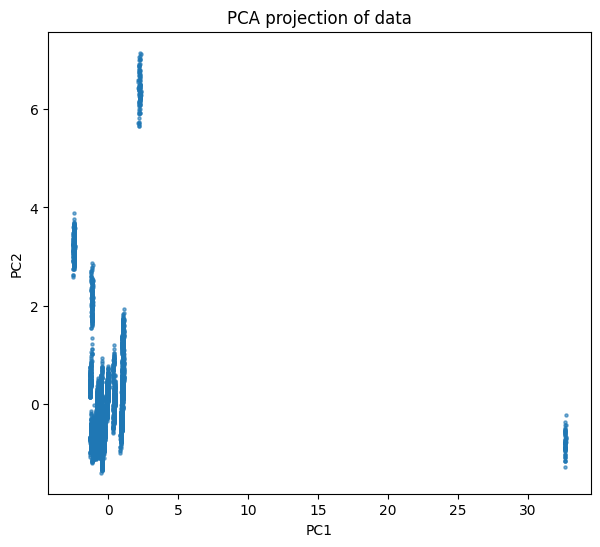

In [ ]:
# plt.figure(figsize=(7, 6))
# plt.scatter(
#     X_pca[:, 0],
#     X_pca[:, 1],
#     s=5,
#     alpha=0.6
# )
# plt.xlabel("PC1")
# plt.ylabel("PC2")
# plt.title("PCA projection of data")
# plt.show()


In [ ]:
# from sklearn.neighbors import NearestNeighbors

# n = 50
# neighbors = NearestNeighbors(n_neighbors=n)
# neighbors_fit = neighbors.fit(X_pca)
# distances, indices = neighbors_fit.kneighbors(X_pca)

# distances = np.sort(distances[:, -1])

# plt.plot(distances)
# plt.ylabel(f"{n}-NN distance")
# plt.xlabel("Sorted points")
# plt.show()



In [ ]:
# from sklearn.cluster import DBSCAN

# dbscan = DBSCAN(
#     eps=1.2,          # chỉnh theo elbow
#     min_samples=n
# )

# labels = dbscan.fit_predict(X_pca)


In [ ]:
# df_clustered = df.copy()
# df_clustered['cluster'] = labels
# df_clustered['cluster'].value_counts()


In [ ]:
# cluster_profile = (
#     df_clustered
#     .groupby('cluster')[[
#         'sales', 'profit', 'quantity',
#         'discount', 'ship_days'
#     ]]
#     .mean()
# )

# cluster_profile


In [ ]:
# noise_ratio = (labels == -1).mean()
# print(f"Noise ratio: {noise_ratio:.2%}")


### HDBSCAN

In [ ]:
# import hdbscan

# clusterer = hdbscan.HDBSCAN(
#     min_cluster_size=150,   # tối thiểu 1 cluster có 100 điểm
#     min_samples=100,         # độ khắt khe mật độ
#     metric="euclidean",
#     cluster_selection_method="eom"
# )

# labels = clusterer.fit_predict(X_pca)



In [ ]:
# cluster_counts = pd.Series(labels).value_counts().sort_index()
# cluster_counts


In [ ]:
# df["cluster_hdbscan"] = labels


In [ ]:
# import matplotlib.pyplot as plt

# plt.figure(figsize=(8, 6))
# scatter = plt.scatter(
#     X_pca[:, 0],
#     X_pca[:, 1],
#     c=labels,
#     s=5,
#     alpha=0.7
# )
# plt.xlabel("PC1")
# plt.ylabel("PC2")
# plt.title("HDBSCAN clusters on PCA space")
# plt.colorbar(scatter, label="Cluster label")
# plt.show()


In [ ]:
# from sklearn.metrics import silhouette_score

# n_clusters = len(set(labels)) - (1 if -1 in labels else 0)
# noise_ratio = np.sum(labels == -1) / len(labels)

# print("Số cluster:", n_clusters)
# print("Tỉ lệ noise:", round(noise_ratio, 2))

# mask = labels != -1
# if len(set(labels[mask])) > 1:
#     sil_score = silhouette_score(X_pca[mask], labels[mask])
#     print("Silhouette score:", round(sil_score, 3))
